In [72]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns

from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping
from keras.losses import SparseCategoricalCrossentropy

In [73]:
X = pd.read_csv("./digit-recognizer/train.csv", sep=",")
Y = pd.read_csv("./digit-recognizer/test.csv", sep=",")

sample_submission = pd.read_csv("./digit-recognizer/sample_submission.csv", sep=",")

In [74]:
X.head(5)
# (42000, 785)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
Y.head(5)
# (28000, 784)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: xlabel='label', ylabel='count'>

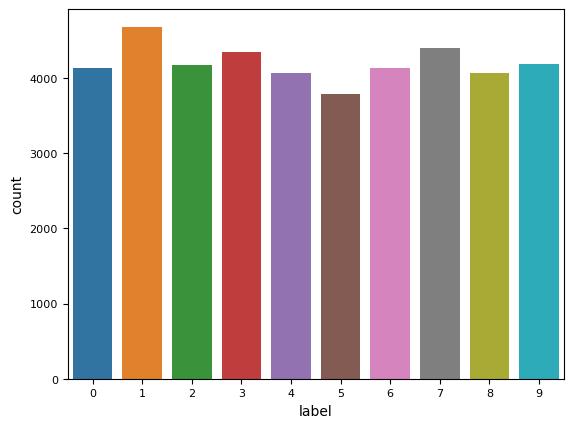

In [76]:
sns.countplot(x = 'label', data = X)

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, X['label'], test_size=0.2, shuffle = True, stratify =X['label'],  random_state=42)

Y_train = LabelBinarizer().fit_transform(Y_train)
Y_test  = LabelBinarizer().fit_transform(Y_test)

X_train = X_train.drop(columns=['label'])
X_test  = X_test.drop(columns=['label'])

X_train = X_train / 255.0
X_test  = X_test / 255.0

X_train=X_train.values.reshape(-1,28,28,1)
X_test=X_test.values.reshape(-1,28,28,1)
Y = Y.values.reshape(-1,28,28,1)

print("Train X dataset shape: ", np.shape(X_train))
print("Train y dataset shape: ", np.shape(Y_train))

print("Test X dataset shape: ", np.shape(X_test))
print("Test y dataset shape: ", np.shape(Y_test))

Train X dataset shape:  (33600, 28, 28, 1)
Train y dataset shape:  (33600, 10)
Test X dataset shape:  (8400, 28, 28, 1)
Test y dataset shape:  (8400, 10)


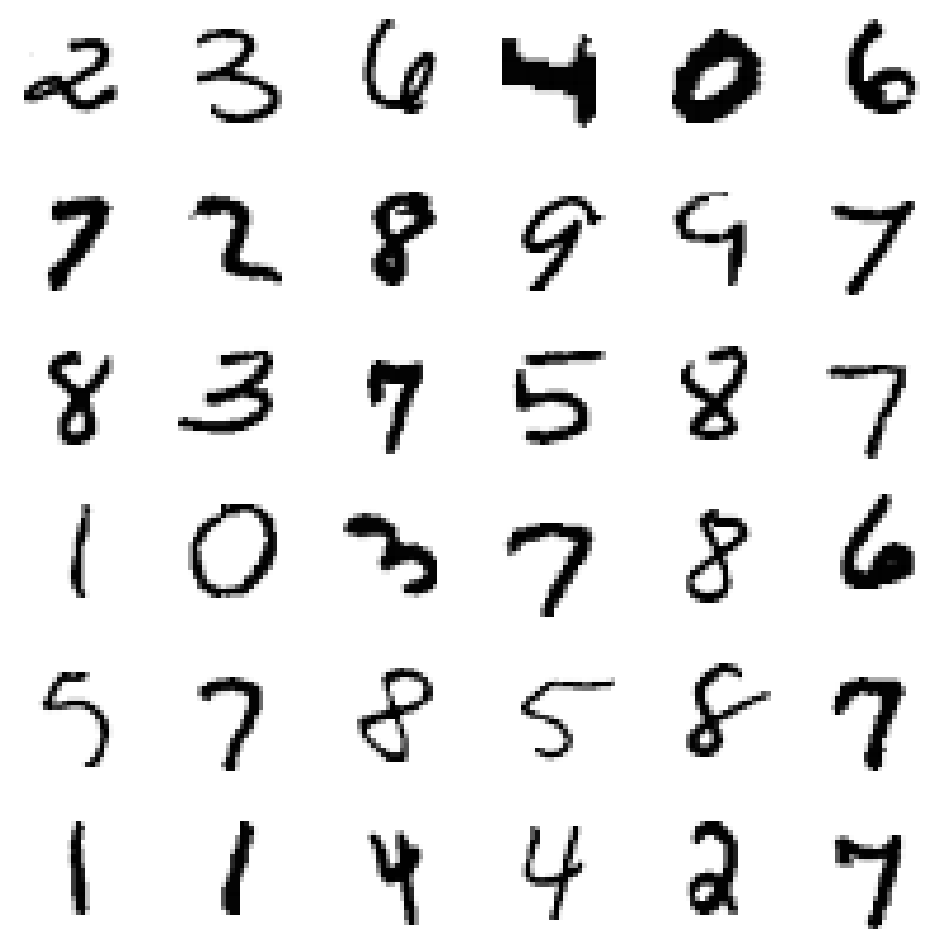

In [78]:
def plot_Image (X_train):
    plt.rc('font', size=10)
    plt.rc('legend', fontsize= 10)
    plt.rc('xtick', labelsize= 8)
    plt.rc('ytick', labelsize= 8)

    fig, ax = plt.subplots(6, 6, figsize = (12, 12))

    img_idx = 0
    for i in range(6):
        for j in range(6):
            ax[i][j].imshow(X_train[img_idx], cmap = 'Greys')
            ax[i][j].axis('off')
            img_idx += 1

    plt.show()
    
plot_Image(X_train)

In [81]:
# Define Sequential model with 2 layers
   
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10,activation=tf.nn.softmax))

#callback=EarlyStopping(monitor='val_accuracy')

model.summary()

#loss=SparseCategoricalCrossentropy(from_logits=True)
#optim=keras.optimizers.Adam(learning_rate=0.1)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5, 
                                           min_lr=0.00001)

model.compile(loss='CategoricalCrossentropy', metrics=['accuracy'], optimizer = Adam())

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 conv2d_73 (Conv2D)          (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_40 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_74 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_75 (Conv2D)          (None, 14, 14, 64)        36928     
                                                     

In [82]:
history = model.fit(X_train, Y_train, epochs=50, batch_size = 100, validation_data=(X_test, Y_test), verbose=1, callbacks = [learning_rate_reduction])

Epoch 1/50
336/336 [==============================] - 50s 146ms/step - loss: 0.2308 - accuracy: 0.9246 - val_loss: 0.0621 - val_accuracy: 0.9812 - lr: 0.0010
Epoch 2/50
336/336 [==============================] - 49s 147ms/step - loss: 0.0655 - accuracy: 0.9791 - val_loss: 0.0487 - val_accuracy: 0.9849 - lr: 0.0010
Epoch 3/50
336/336 [==============================] - 50s 148ms/step - loss: 0.0486 - accuracy: 0.9849 - val_loss: 0.0373 - val_accuracy: 0.9892 - lr: 0.0010
Epoch 4/50
336/336 [==============================] - 50s 149ms/step - loss: 0.0381 - accuracy: 0.9876 - val_loss: 0.0361 - val_accuracy: 0.9894 - lr: 0.0010
Epoch 5/50
336/336 [==============================] - 50s 148ms/step - loss: 0.0306 - accuracy: 0.9897 - val_loss: 0.0382 - val_accuracy: 0.9894 - lr: 0.0010
Epoch 6/50
336/336 [==============================] - 50s 147ms/step - loss: 0.0275 - accuracy: 0.9910 - val_loss: 0.0356 - val_accuracy: 0.9900 - lr: 0.0010
Epoch 7/50
336/336 [==============================] 

In [83]:
Y = pd.read_csv("./digit-recognizer/test.csv", sep=",")
Y = Y.values.reshape(-1,28,28,1)

pred = model.predict(Y)

875/875 [==============================] - 9s 10ms/step


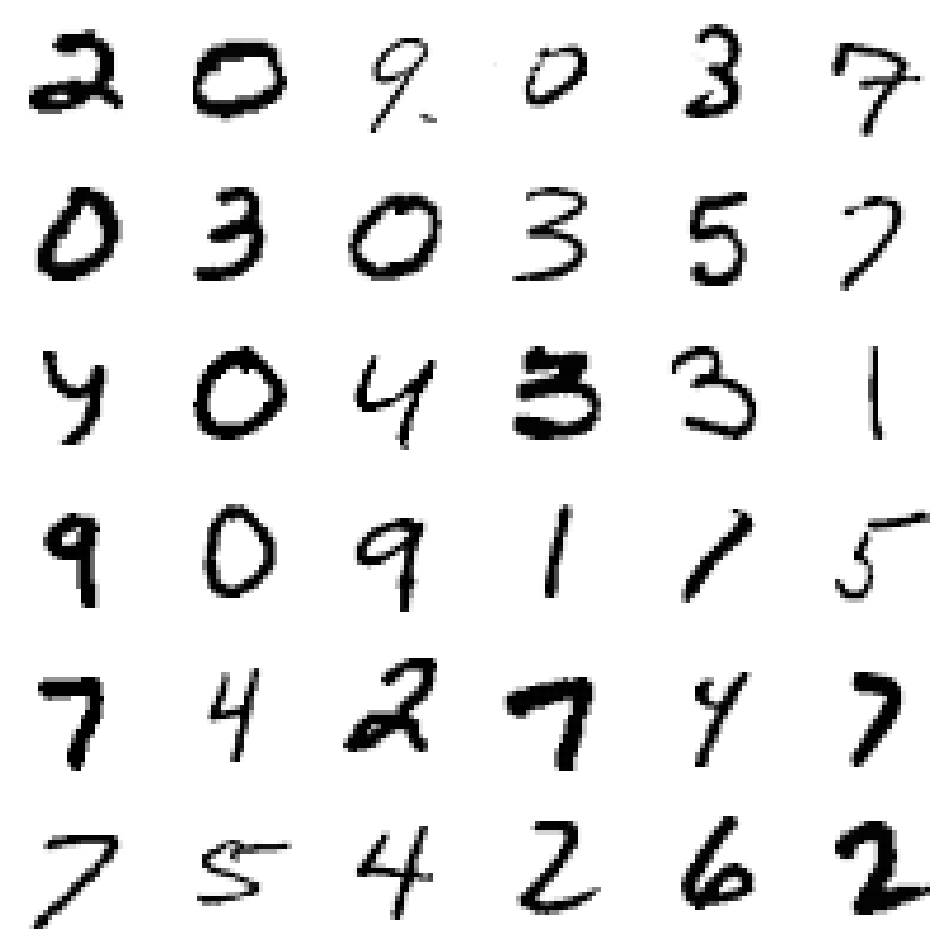

In [84]:
plot_Image(Y)

In [85]:
df = pd.DataFrame(columns=["ImageId","Label"])

df.Label   = [_.argmax() for _ in pred]
df.ImageId = df.index+1
df.to_csv("./digit-recognizer/submission.csv", index = False)

df[:36]

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [86]:
def plot_losses(history):
    plt.rcParams['figure.figsize'] = [20, 5]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

    ax1.set_title('Losses')
    ax1.set_xlabel('epoch')
    ax1.legend(loc="upper right")
    ax1.grid()
    ax1.plot(history['loss'], label='Training loss')
    ax1.plot(history['val_loss'], label='Validation loss')
    ax1.legend()

    ax2.set_title('Accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(loc="upper right")
    ax2.grid()
    ax2.plot(history['accuracy'], label='Training accuracy')
    ax2.plot(history['val_accuracy'], label='Validation accuracy')
    ax2.legend()

    plt.show()

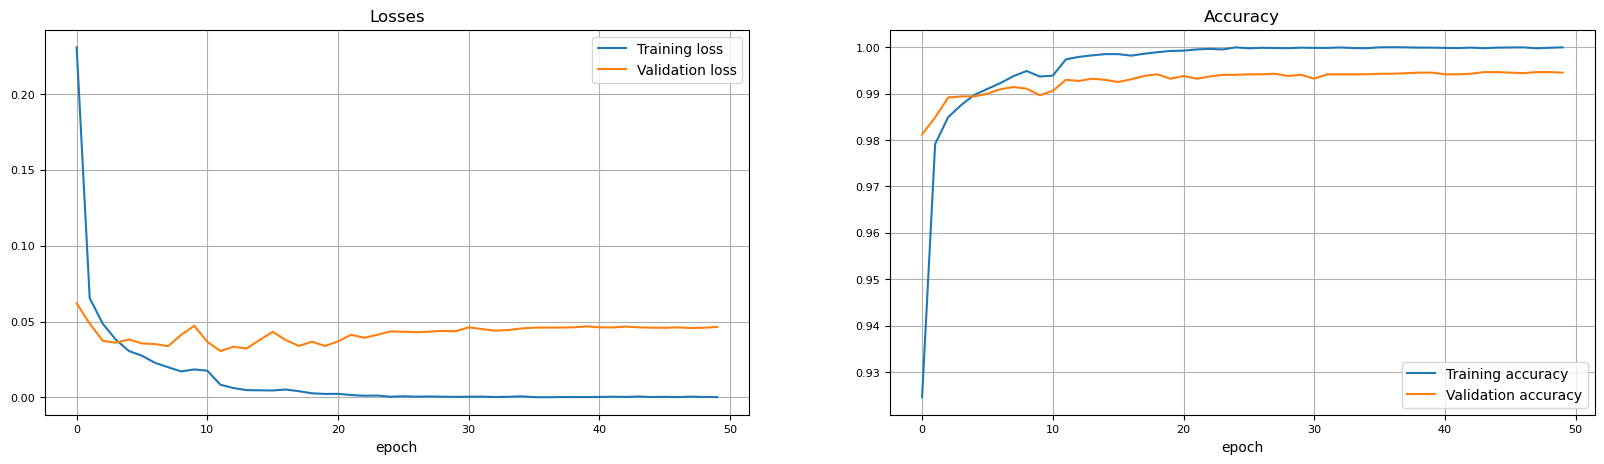

In [87]:
plot_losses(history.history)